In [24]:
import numpy as np

matriz = np.zeros((400, 31266), int)

In [25]:
from PIL import Image
import os

path = 'assets'
imagens = sorted([img for img in os.listdir(path) if img.endswith('.jpg')])

for i, imagem_nome in enumerate(imagens):
    img_path = os.path.join(path, imagem_nome)
    img = Image.open(img_path).convert('L')
    img_resized = img.resize((193, 162)) 
    matriz[i, :] = np.array(img_resized).flatten()

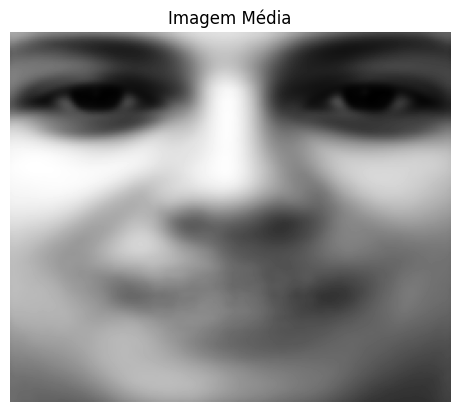

In [26]:
import matplotlib.pyplot as plt

imagem_media = np.mean(matriz, axis=0)

imagem_media_reshaped = imagem_media.reshape(162, 193)

plt.imshow(imagem_media_reshaped, cmap='gray')
plt.title("Imagem Média")
plt.axis('off')
plt.show()


In [27]:
matriz_centralizada = matriz - imagem_media

u, s, vh = np.linalg.svd(matriz_centralizada, full_matrices=False)

u_componentes_principais = u 

print("Componentes principais calculadas com sucesso.")


Componentes principais calculadas com sucesso.


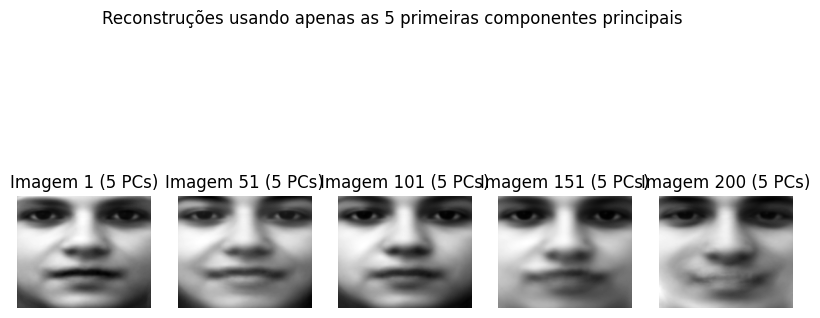

In [28]:
import matplotlib.pyplot as plt

# Número de componentes principais a serem usadas na reconstrução
num_componentes = 5

# Selecione 5 imagens aleatórias para reconstrução
indices_imagens = [0, 50, 100, 150, 199]  # Ajuste os índices conforme desejado

# Figura para plotar as reconstruções
plt.figure(figsize=(10, 5))

for i, idx in enumerate(indices_imagens):
    # Projeções da imagem nas primeiras 'num_componentes' componentes principais
    coeficientes = np.dot(matriz_centralizada[idx, :], vh[:num_componentes, :].T)
    
    # Reconstrua a imagem usando apenas as primeiras 'num_componentes' componentes principais
    imagem_reconstruida = imagem_media + np.dot(coeficientes, vh[:num_componentes, :])
    
    # Redimensione para o formato de imagem original (162x193)
    imagem_reconstruida_reshaped = imagem_reconstruida.reshape(162, 193)
    
    # Mostre a imagem reconstruída
    plt.subplot(1, 5, i + 1)
    plt.imshow(imagem_reconstruida_reshaped, cmap='gray')
    plt.title(f"Imagem {idx + 1} (5 PCs)")
    plt.axis('off')

plt.suptitle("Reconstruções usando apenas as 5 primeiras componentes principais")
plt.show()


In [29]:
from PIL import Image
import numpy as np

caminho_imagem = 'my_pics/IMG_1396.JPG'
caminho_imagem_sorrindo = 'my_pics/IMG_1397.JPG'

imagem = Image.open(caminho_imagem).convert('L').resize((193, 162))
imagem_sorrindo = Image.open(caminho_imagem_sorrindo).convert('L').resize((193, 162))

imagem_vetor = np.array(imagem).flatten()
imagem_vetor_sorrindo = np.array(imagem_sorrindo).flatten()

print("Tamanho do vetor:", imagem_vetor.shape)
print("Tamanho do vetor:", imagem_vetor_sorrindo.shape)




Tamanho do vetor: (31266,)
Tamanho do vetor: (31266,)


Primeiros 10 coeficientes para a imagem:
[ 3688.08191055   -19.72337853 -1175.31228991   892.0332349
  2083.59611945   657.89340193   637.2000628   2010.17918609
  2134.0479677   1216.55200245]

Primeiros 10 coeficientes para a imagem sorrindo:
[ 3498.35980306  -130.83500954 -1333.28947836   882.15198066
  1657.08838161   869.34618887   595.62532241  2446.56772581
  1921.02467195  1210.11445661]


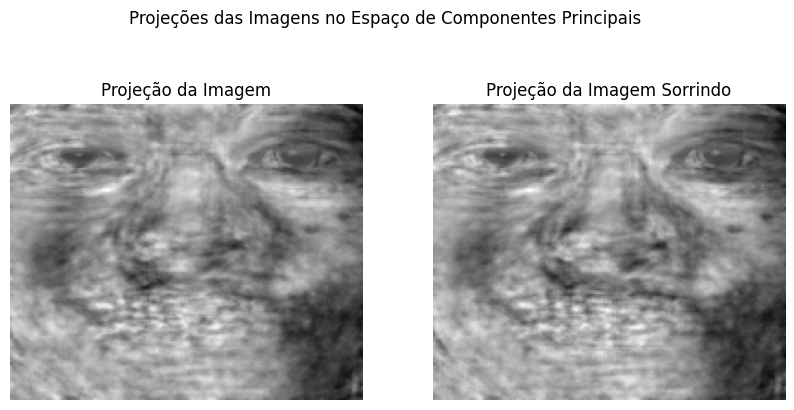

In [30]:
import matplotlib.pyplot as plt

# Subtrair a imagem média das duas fotos
imagem_diferenca = imagem_vetor - imagem_media
imagem_diferenca_sorrindo = imagem_vetor_sorrindo - imagem_media

# Projetar as diferenças no espaço das 200 componentes principais
coeficientes_imagem = np.dot(imagem_diferenca, vh.T)
coeficientes_imagem_sorrindo = np.dot(imagem_diferenca_sorrindo, vh.T)

# Exibir os primeiros 10 coeficientes para cada imagem
print("Primeiros 10 coeficientes para a imagem:")
print(coeficientes_imagem[:10])

print("\nPrimeiros 10 coeficientes para a imagem sorrindo:")
print(coeficientes_imagem_sorrindo[:10])

# Reconstruir as projeções usando todos os 200 coeficientes
projecao_imagem = imagem_media + np.dot(coeficientes_imagem, vh)
projecao_imagem_sorrindo = imagem_media + np.dot(coeficientes_imagem_sorrindo, vh)

# Redimensione para o formato original (162x193) para visualização
projecao_imagem_reshaped = projecao_imagem.reshape(162, 193)
projecao_imagem_sorrindo_reshaped = projecao_imagem_sorrindo.reshape(162, 193)

# Exibir as projeções das duas imagens
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(projecao_imagem_reshaped, cmap='gray')
plt.title("Projeção da Imagem")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(projecao_imagem_sorrindo_reshaped, cmap='gray')
plt.title("Projeção da Imagem Sorrindo")
plt.axis('off')

plt.suptitle("Projeções das Imagens no Espaço de Componentes Principais")
plt.show()


In [31]:
import numpy as np
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LinearRegression, Perceptron
from sklearn.metrics import accuracy_score

# Função para reduzir a dimensionalidade das 400 imagens
def reduzir_dimensionalidade(matriz, n_componentes):
    svd = TruncatedSVD(n_components=n_componentes)
    return svd.fit_transform(matriz)

# Índices e rótulos para mulheres e homens
indices_mulheres = [20, 21, 399, 398, 397, 396, 395, 394, 393, 392, 391, 390, 389, 388, 377, 376, 367, 366, 365, 364, 361, 360]
indices_homens = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

# Extrair imagens e rótulos para treino
X_treino = np.vstack([matriz[idx] for idx in indices_mulheres + indices_homens])
y_treino = np.array([1] * len(indices_mulheres) + [-1] * len(indices_homens))

# Extraindo as imagens de teste (excluindo as de treino)
X_teste = np.delete(matriz, indices_mulheres + indices_homens, axis=0)

# Função para treinar e avaliar o classificador
def treinar_e_avaliar(n_componentes):
    # Reduzir a dimensionalidade para n_componentes
    X_reduzido = reduzir_dimensionalidade(matriz, n_componentes)
    
    # Dados de treino e teste após a redução
    X_treino_reduzido = X_reduzido[indices_mulheres + indices_homens]
    X_teste_reduzido = np.delete(X_reduzido, indices_mulheres + indices_homens, axis=0)

    # Classificação usando Mínimos Quadrados
    modelo_regressao = LinearRegression()
    modelo_regressao.fit(X_treino_reduzido, y_treino)
    y_pred_regressao = modelo_regressao.predict(X_teste_reduzido)
    y_pred_regressao = np.where(y_pred_regressao >= 0, 1, -1)
    
    # Classificação usando Perceptron
    modelo_perceptron = Perceptron()
    modelo_perceptron.fit(X_treino_reduzido, y_treino)
    y_pred_perceptron = modelo_perceptron.predict(X_teste_reduzido)
    
    # Criar vetor de rótulos reais para teste
    num_homens_teste = len(X_teste_reduzido) // 2
    num_mulheres_teste = len(X_teste_reduzido) - num_homens_teste
    y_verdadeiro = np.array([1] * num_mulheres_teste + [-1] * num_homens_teste)
    
    # Calcular a precisão
    acuracia_regressao = accuracy_score(y_verdadeiro, y_pred_regressao)
    acuracia_perceptron = accuracy_score(y_verdadeiro, y_pred_perceptron)

    print(f"Acurácia com {n_componentes} componentes principais:")
    print(f"- Mínimos Quadrados: {acuracia_regressao:.2%}")
    print(f"- Perceptron: {acuracia_perceptron:.2%}")

# Avaliar com 2 componentes principais
treinar_e_avaliar(2)

# Avaliar com 3 componentes principais
treinar_e_avaliar(3)


Acurácia com 2 componentes principais:
- Mínimos Quadrados: 50.84%
- Perceptron: 50.00%
Acurácia com 3 componentes principais:
- Mínimos Quadrados: 50.84%
- Perceptron: 50.00%


Acurácia com 2 componentes principais para classificação de sorriso:
- Mínimos Quadrados: 51.11%
- Perceptron: 50.83%

Previsão para o índice de teste 42:
- Mínimos Quadrados: Não Sorrindo
- Perceptron: Não Sorrindo


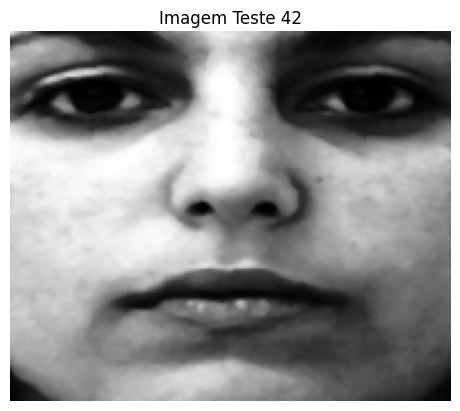

Acurácia com 3 componentes principais para classificação de sorriso:
- Mínimos Quadrados: 49.72%
- Perceptron: 50.00%

Previsão para o índice de teste 42:
- Mínimos Quadrados: Não Sorrindo
- Perceptron: Não Sorrindo


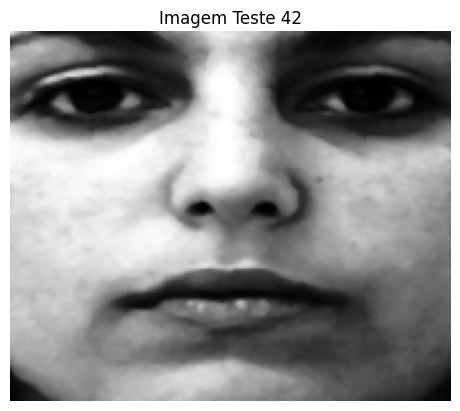

In [41]:
import numpy as np
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LinearRegression, Perceptron
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Função para reduzir a dimensionalidade das 400 imagens
def reduzir_dimensionalidade(matriz, n_componentes):
    svd = TruncatedSVD(n_components=n_componentes)
    return svd.fit_transform(matriz)

# Função para exibir uma imagem
def mostrar_imagem(imagem, titulo="Imagem"):
    imagem_reshape = imagem.reshape(162, 193)  # Reshape de acordo com o tamanho da imagem
    plt.imshow(imagem_reshape, cmap='gray')
    plt.title(titulo)
    plt.axis('off')
    plt.show()

# Defina os índices das imagens que estão sorrindo e não sorrindo
indices_sorrindo = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 25, 27, 29, 31, 33, 35, 37, 39, 41]  # Preencha com os índices das imagens sorrindo
indices_nao_sorrindo = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38]  # Preencha com os índices das imagens não sorrindo

# Criar dados de treino
X_treino_sorrindo = np.vstack([matriz[idx] for idx in indices_sorrindo])
y_treino_sorrindo = np.array([1] * len(indices_sorrindo))  # 1 para sorrindo

X_treino_nao_sorrindo = np.vstack([matriz[idx] for idx in indices_nao_sorrindo])
y_treino_nao_sorrindo = np.array([-1] * len(indices_nao_sorrindo))  # -1 para não sorrindo

# Combinar os dados de treino
X_treino = np.vstack([X_treino_sorrindo, X_treino_nao_sorrindo])
y_treino = np.concatenate([y_treino_sorrindo, y_treino_nao_sorrindo])

# Extrair as imagens de teste (excluindo as de treino)
X_teste = np.delete(matriz, indices_sorrindo + indices_nao_sorrindo, axis=0)

# Função para treinar e avaliar o classificador
def treinar_e_avaliar_sorriso(n_componentes, indice_teste):
    # Reduzir a dimensionalidade para n_componentes
    X_reduzido = reduzir_dimensionalidade(matriz, n_componentes)
    
    # Dados de treino e teste após a redução
    X_treino_reduzido = X_reduzido[indices_sorrindo + indices_nao_sorrindo]
    X_teste_reduzido = np.delete(X_reduzido, indices_sorrindo + indices_nao_sorrindo, axis=0)

    # Classificação usando Mínimos Quadrados
    modelo_regressao = LinearRegression()
    modelo_regressao.fit(X_treino_reduzido, y_treino)
    y_pred_regressao = modelo_regressao.predict(X_teste_reduzido)
    y_pred_regressao = np.where(y_pred_regressao >= 0, 1, -1)
    
    # Classificação usando Perceptron
    modelo_perceptron = Perceptron()
    modelo_perceptron.fit(X_treino_reduzido, y_treino)
    y_pred_perceptron = modelo_perceptron.predict(X_teste_reduzido)
    
    # Criar vetor de rótulos reais para teste
    num_nao_sorrindo_teste = len(X_teste_reduzido) // 2  # ajuste se necessário
    num_sorrindo_teste = len(X_teste_reduzido) - num_nao_sorrindo_teste
    y_verdadeiro = np.array([1] * num_sorrindo_teste + [-1] * num_nao_sorrindo_teste)
    
    # Calcular a precisão
    acuracia_regressao = accuracy_score(y_verdadeiro, y_pred_regressao)
    acuracia_perceptron = accuracy_score(y_verdadeiro, y_pred_perceptron)

    print(f"Acurácia com {n_componentes} componentes principais para classificação de sorriso:")
    print(f"- Mínimos Quadrados: {acuracia_regressao:.2%}")
    print(f"- Perceptron: {acuracia_perceptron:.2%}")

    # Testar um índice específico
    if 0 <= indice_teste < len(X_teste_reduzido):
        previsao_regressao = y_pred_regressao[indice_teste]
        previsao_perceptron = y_pred_perceptron[indice_teste]

        print(f"\nPrevisão para o índice de teste {indice_teste}:")
        print(f"- Mínimos Quadrados: {'Sorrindo' if previsao_regressao == 1 else 'Não Sorrindo'}")
        print(f"- Perceptron: {'Sorrindo' if previsao_perceptron == 1 else 'Não Sorrindo'}")

        # Mostrar a imagem correspondente ao índice de teste
        imagem_teste = X_teste[indice_teste]
        mostrar_imagem(imagem_teste, titulo=f"Imagem Teste {indice_teste}")

    else:
        print("Índice de teste fora do intervalo.")

# Escolha um índice de teste (de 0 a 359, considerando que as imagens de treino ocupam os primeiros 40 índices)
indice_teste = 42  # Altere este índice conforme necessário

# Avaliar com 2 componentes principais
treinar_e_avaliar_sorriso(2, indice_teste)

# Avaliar com 3 componentes principais
treinar_e_avaliar_sorriso(3, indice_teste)


Acurácia com 2 componentes principais:
- Mínimos Quadrados: 52.50%
- Perceptron: 53.06%

Previsão para o índice de teste 99:
- Mínimos Quadrados: Mulher
- Perceptron: Mulher


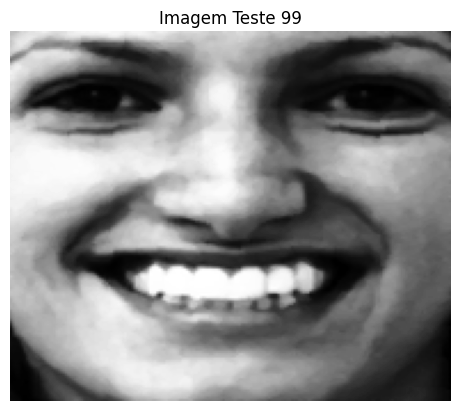



Acurácia com 10 componentes principais:
- Mínimos Quadrados: 59.72%
- Perceptron: 58.33%

Previsão para o índice de teste 99:
- Mínimos Quadrados: Mulher
- Perceptron: Mulher


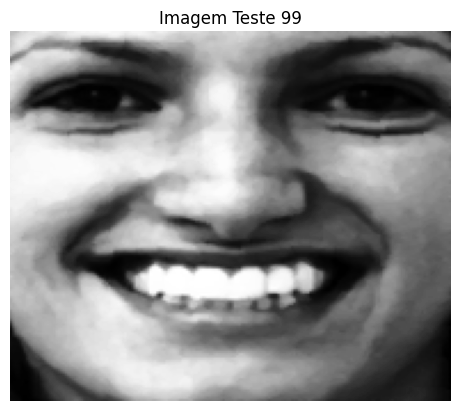

In [38]:
import numpy as np
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LinearRegression, Perceptron
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Função para reduzir a dimensionalidade das 400 imagens
def reduzir_dimensionalidade(matriz, n_componentes):
    svd = TruncatedSVD(n_components=n_componentes)
    return svd.fit_transform(matriz)

# Função para exibir uma imagem
def mostrar_imagem(imagem, titulo="Imagem"):
    imagem_reshape = imagem.reshape(162, 193)  # Reshape de acordo com o tamanho da imagem
    plt.imshow(imagem_reshape, cmap='gray')
    plt.title(titulo)
    plt.axis('off')
    plt.show()

# Índices e rótulos para mulheres e homens
indices_mulheres = [ 397, 396, 395, 394, 393, 392, 391, 390, 367, 366, 365, 364, 90, 91, 92, 93, 96, 97, 98 ,99]
indices_homens = [ 14, 15, 16, 17, 18, 19, 24, 25, 26, 27, 28, 29, 30, 31, 34, 35, 38, 39, 104, 105]

# Extrair imagens e rótulos para treino
X_treino = np.vstack([matriz[idx] for idx in indices_mulheres + indices_homens])
y_treino = np.array([1] * len(indices_mulheres) + [-1] * len(indices_homens))

# Extraindo as imagens de teste (excluindo as de treino)
X_teste = np.delete(matriz, indices_mulheres + indices_homens, axis=0)

# Função para treinar e avaliar o classificador
def treinar_e_avaliar(n_componentes, indice_teste):
    # Reduzir a dimensionalidade para n_componentes
    X_reduzido = reduzir_dimensionalidade(matriz, n_componentes)
    
    # Dados de treino e teste após a redução
    X_treino_reduzido = X_reduzido[indices_mulheres + indices_homens]
    X_teste_reduzido = np.delete(X_reduzido, indices_mulheres + indices_homens, axis=0)

    # Classificação usando Mínimos Quadrados
    modelo_regressao = LinearRegression()
    modelo_regressao.fit(X_treino_reduzido, y_treino)
    y_pred_regressao = modelo_regressao.predict(X_teste_reduzido)
    y_pred_regressao = np.where(y_pred_regressao >= 0, 1, -1)
    
    # Classificação usando Perceptron
    modelo_perceptron = Perceptron()
    modelo_perceptron.fit(X_treino_reduzido, y_treino)
    y_pred_perceptron = modelo_perceptron.predict(X_teste_reduzido)
    
    # Criar vetor de rótulos reais para teste
    num_homens_teste = (len(X_teste_reduzido) // 2)  # ajuste se necessário
    num_mulheres_teste = len(X_teste_reduzido) - num_homens_teste
    y_verdadeiro = np.array([1] * num_mulheres_teste + [-1] * num_homens_teste)
    
    # Calcular a precisão
    acuracia_regressao = accuracy_score(y_verdadeiro, y_pred_regressao)
    acuracia_perceptron = accuracy_score(y_verdadeiro, y_pred_perceptron)

    print(f"Acurácia com {n_componentes} componentes principais:")
    print(f"- Mínimos Quadrados: {acuracia_regressao:.2%}")
    print(f"- Perceptron: {acuracia_perceptron:.2%}")

    # Testar um índice específico
    if 0 <= indice_teste < len(X_teste_reduzido):
        previsao_regressao = y_pred_regressao[indice_teste]
        previsao_perceptron = y_pred_perceptron[indice_teste]

        print(f"\nPrevisão para o índice de teste {indice_teste}:")
        print(f"- Mínimos Quadrados: {'Mulher' if previsao_regressao == 1 else 'Homem'}")
        print(f"- Perceptron: {'Mulher' if previsao_perceptron == 1 else 'Homem'}")

        # Mostrar a imagem correspondente ao índice de teste
        imagem_teste = X_teste[indice_teste]
        mostrar_imagem(imagem_teste, titulo=f"Imagem Teste {indice_teste}")

    else:
        print("Índice de teste fora do intervalo.")

# Escolha um índice de teste (de 0 a 359, considerando que as imagens de treino ocupam os primeiros 40 índices)
indice_teste = 99  # Altere este índice conforme necessário

# Avaliar com 2 componentes principais
treinar_e_avaliar(2, indice_teste)
print('\n')
# Avaliar com 3 componentes principais
treinar_e_avaliar(10, indice_teste)
